# Some applications with Scipy

Ref.: [Scipy doc](https://docs.scipy.org/doc/scipy/reference/)

In [1]:
%matplotlib notebook
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import numba

## Planet simulation using gravity

Let's consider two bodies (planets) with respective mass $m_1$ and $m_2$ at positions $P_1$ and $P_2$. Planet 2 will apply a force on planet 1 as follows:

$$
\vec F_{2\rightarrow 1} = G \times \dfrac{m_1 m_2}{r^2} \vec u_{12}
$$

Where:

* $G$ is the gravitational constant,
* and $\vec u_{12}$ is a unit vector coming from $P_1$ and going to $P_2$

So the acceleration of planet $i$ caused by other planets will be:

$$
\vec A(i/0) = \sum_{j\neq i} G \times \dfrac{m_j}{r_{ij}^2} \vec u_{ij}
$$

Let's assume that the position of the planet $i$ is:

$$
\vec{OP_i} = \begin{bmatrix} x_i \\ y_i \\ z_i \end{bmatrix}
$$

The speed is:

$$
\vec V(i/0) = \begin{bmatrix} \dot x_i \\ \dot y_i \\ \dot z_i \end{bmatrix}
$$

The acceleration is:

$$
\vec A(i/0) = \begin{bmatrix} \ddot x_i \\ \ddot y_i \\ \ddot z_i \end{bmatrix}
$$

So the differential equations we need to solve:

$$
\begin{bmatrix} \ddot x_i \\ \ddot y_i \\ \ddot z_i \end{bmatrix}
=
G \sum_{j\neq i}  \dfrac{m_j}{r_{ij}^2} \vec u_{ij}  
$$

With:
* $r_{ij}^2 = (x_i - x_j)^2 + (y_i - y_j)^2 +  (z_i - z_j)^2  $ 
* and:

$$
u_{ij} = \dfrac{\vec {P_iP_j}}{ r_{ij}}
$$


In order to solve the equation numerically, we have to rewrite it as a first order equation in the form:

$$
\dot X = f(X, t)
$$

Here:
$$
X = \begin{bmatrix} x_0 \\ y_0 \\ z_0 \\ \ldots \\ x_{N-1} \\ y_{N-1} \\ z_{N-1} \\ 
    \dot x_0 \\ \dot y_0 \\ \dot z_0 \\ \ldots \\ \dot x_{N-1} \\ \dot y_{N-1} \\ \dot z_{N-1}
    \end{bmatrix}
$$

So 

$$
\dot X = \begin{bmatrix} 
    \dot x_0 \\ \dot y_0 \\ \dot z_0 \\ \ldots \\ \dot x_{N-1} \\ \dot y_{N-1} \\ \dot z_{N-1} \\
    \ddot x_0 \\ \ddot y_0 \\ \ddot z_0 \\ \ldots \\ \ddot x_{N-1} \\ \ddot y_{N-1} \\ \ddot z_{N-1}
    \end{bmatrix}
$$

Let's code it:

In [2]:
def packX(P, V):
    """
    Packs the positions and speeds in a 1D array
    """
    return np.concatenate([P.flatten(), V.flatten()])

def unpackX(X):
    """
    Unpacks X in P and V
    """
    P = X[     : Np*3].reshape(Np, 3) # Position
    V = X[Np*3 :     ].reshape(Np, 3) # Speed
    return P, V

#@numba.jit()
def f(X, t):
    """
    Gravity as an ordinary differential equation (ODE)
    """
    P, V = unpackX(X)
    Np = len(P)
    A = np.zeros_like(P) # Acceleration vectors
    for i in range(Np):
        for j in range(Np):
            if j != i:
                Pi = P[i]
                Pj = P[j]
                PiPj = Pj-Pi
                rij = (PiPj**2).sum()**.5 # Distance between planets
                uij = PiPj / rij
                A[i] += G * mp[j] / rij**2 * uij
    dotX = packX(V, A)
    return dotX



In [3]:
G = 1.e-0
Np = 3 # Number of planets
mp = np.ones(Np) # Mass of the planets
mp[0] = 10. # Sun
P0 = np.random.rand(Np * 3).reshape(Np, 3)-.5 # Planet initial position
P0[0] *= 0
V0 = (np.random.rand(Np * 3).reshape(Np, 3)-.5)*10 # Planet initial speeds
V0[0] *= 0

X0 = packX(P0, V0)
Nt = 10000
t = np.linspace(0., 10., Nt) # Time steps
sol = integrate.odeint(f, X0, t)


<IPython.core.display.Javascript object>


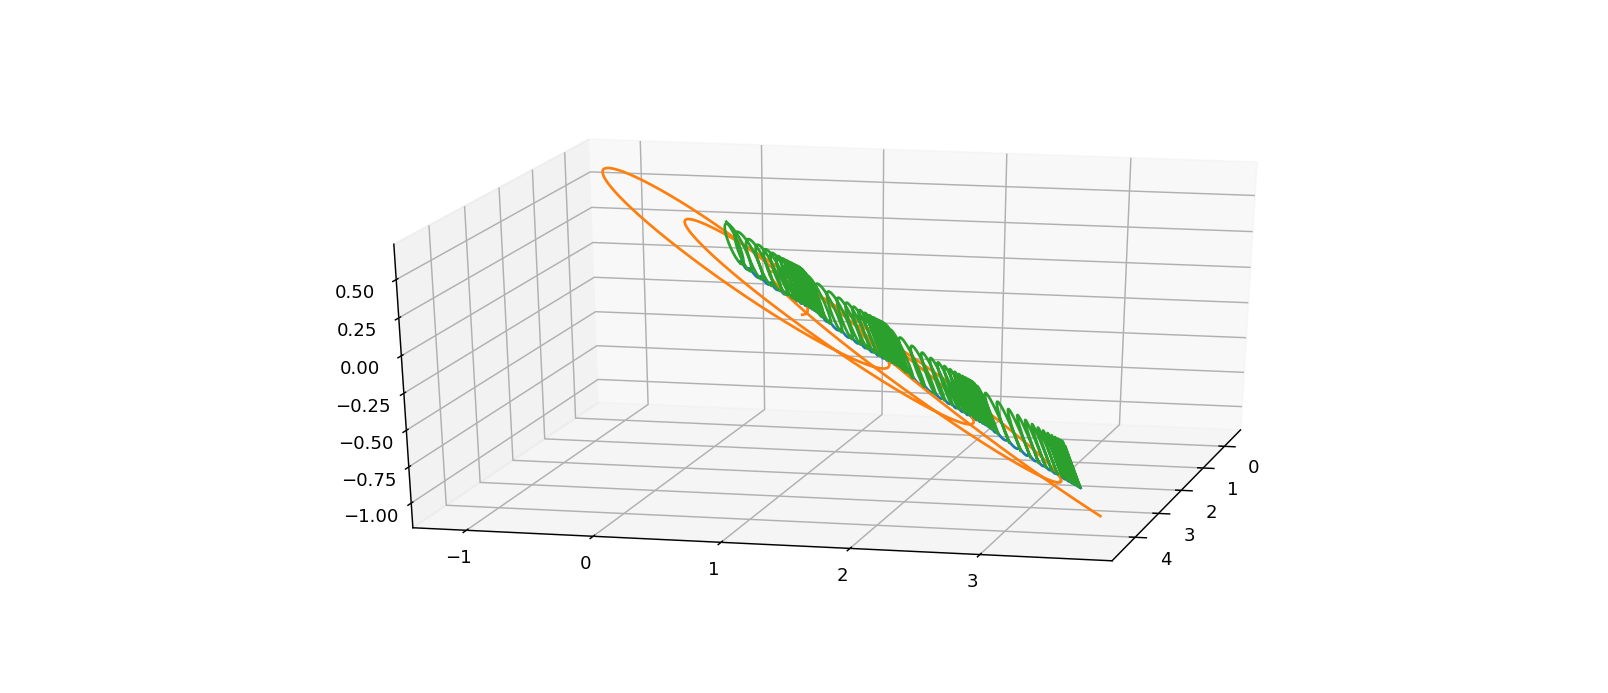

In [4]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

Psol = sol[:, :Np*3].reshape(Nt,Np,3)

fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range(Np):
    plt.plot(Psol[:, i, 0], Psol[:, i, 1],Psol[:, i, 2] )
plt.show()